# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The 'No-show appointments' dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. These characteristics are the following:

* **PatientId:** The national ID of each patient scheduled an appointment.
* **AppointmentID:** The appointment ID assigned automatically and uniquelly by the system for each appointment.
* **Gender:** The gender (M / F) of each patient schecduled an appointment.
* **ScheduledDay:** The date and time of scheduling an appointment.
* **AppointmentDay:** The date of the patient's appointment.
* **Age:** The age of each patient schecduled an appointment.
* **Neighborhood:** The neighborhood of each patient schecduled an appointment. This indicates the location of the hospital.
* **Scholarship:** Indicates whether or not (1 / 0) the patient is enrolled in Brasilian welfare program Bolsa Família.
* **Hipertension:** Indicates whether or not (1 / 0) the patient has a high blood pressure disease.
* **Diabetes:** Indicates whether or not (1 / 0) the patient has a diabetes disease.
* **Alcoholism:** Indicates whether or not (1 / 0) the patient is alcoholic.
* **Handicap:** Indicates whether or not (1 / 0) the patient has any disability.
* **SMS_received:** Indicates whether or not (1 / 0) the patient received a reminder SMS.
* **No-show:** Indicates whether or not (Yes / No) the patient missed the appointment. it shows ‘No’ if the patient attended the appointment, and ‘Yes’ if they did not attend.


### Question(s) for Analysis

After reviewing the dataset, check it's attributes and the main context, several questions could be asked to explore the data. Here, we will focus on the following main questions:

1) What factors are important to predict if a patient will show up for their scheduled appointment?
2) How does the time difference between the scheduled date and the appointment date (waiting time) affect the no-show rate? 

In [1]:

import numpy as np
import pandas as pd

#Import the required libraries (Numpy and Pandas) to be used in this project.

<a id='wrangling'></a>
## Data Wrangling

In this section we started by gathering the data through downloading the CSV file called - `noshowappointments-kagglev2-may-2016.csv` - from Kaggle for the **No-show appointments** project. As mentioned in the previous section, this dataset includes 14 characteristics (columns) and over 100k records for medical appointments in Brazil. Also, in this section we will perform some operations to inspect data types and look for instances of missing or possibly errant data.  


### General Properties

In this subsection the data will be loaded and some operations will be performed in order to inspect the data size, data types, and look for instances of missing or errant data.

In [2]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
# Load the data from a CSV file called 'noshowappointments-kagglev2-may-2016.csv'.

df.head()
# Print the first 5 records in the DataFrame loaded previously.

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()
# Returns info about the DataFrame including the number of non-null values.

df.shape
# Returns the shape of the DataFrame, including number of rows and columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

As shown in the output of the .info() function, there is no missing data and all columns include the same Non-Null count (110,527). Also, the data types of columns are listed in the same output, showing that one (1) column is float, eight (8) columns are int64, and five (5) columns are object (string).

It's obvious from these information that all columns' names starting with capital letter, and one column name includes underscore `SMS_received`, and another one includes hyphen `No-show`. There is also some spelling mistakes in the following column names: `Hipertension` and `Handcap`. 

In [4]:
df.describe()
# Returns summary statistics of the DataFrame, including mean, count, etc.

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can notice through the previous information and the summary statistics, there is no missing data in all rows and columns. on the other hand, there are some errant data could be noticed in the data, such as the `age` column includes a value in minus, where the age range is -1 to 115.

On the othe hand, it's obvious through the maximum number in the `Handcap` column that the range of it is 0 to 4, and it should be eaither 0 or 1 to reflect whether the patient has disability or not.

Also, the data type of the `PatientId` column is float, which make it unreadable and not useful, while it should be either integer or string.


### Data Cleaning

In this sub-section will start data cleaning through preparing the data for analysis by identifying and dealing with problems, inconsistant data, inappropriate data types and outliers that may affect the analysis process and results.

First will start with renaming all columns names to be in lower case to be consistent and easy to be used in next steps during the analysis.

Then will also use rename function to replace the hyphen " - " in `no-show` with the underscore " _ " in order to be used easily in the analysis process.
 

In [5]:
df.rename(columns=lambda x: x.lower(), inplace=True)
# Rename all columns names to set them in lower case.
# Use lambda function to perform this operation.

In [6]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
# Rename all columns names to replace the hypthen "-" with underscore "_" if exist.
# Use lambda function to perform this operation.

In [7]:
def rename_column(old_name, new_name):
    df.rename(columns={old_name: new_name}, inplace=True)
# Define a function to rename columns names to be used in renaming multi-columns.

In [8]:
rename_column('hipertension', 'hypertension')
# Rename the "hipertension" column to solve the spelling mistake.

In [9]:
rename_column('handcap', 'handicap')
# Rename the "handcap" column to solve the spelling mistake.

In [10]:
rename_column('no_show', 'no_show_desc')
# Rename the "no_show" column to add another column with the same name with binary values.

In [11]:
df['no_show'] = df['no_show_desc'].apply(lambda x: 1 if x == 'Yes' else 0)
# Add a new column with a "no_show" name including binary values.

In the previous code cells we used the built-in function `lambda` to rename all columns names to in lower case, and replace all hyphens " - " with underscore " _ ".

Also, defined a function to rename columns names to be used multi-times to reduce repeating the same code. This function is used to solve spelling mistakes in the `hipertension` and `handcap` columns, besides using it to rename the `no_show` column to use the same column name in a new column including binary values 0 or 1.

The new column is named `no_show` and includes binary values, 0 when the `no_show_desc` is "No" - which means the patient showed up in the appointment day - and 1 when the `no_show_desc` is "Yes" - means the appointment is missed-. 

In [12]:
df.head()
# Print the first 5 records in the DataFrame to see the changes made on the columns names.

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show_desc,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [13]:
df.patientid = df.patientid.astype(int)
# Convert the data type of the "patientid" column from float into int64 

In [14]:
integers64 = ['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
for integer in integers64:
    df[integer] = df[integer].astype('int8')

# Convert the data type of all columns that require lower size from int64 into int8 

In [15]:
dates = ['scheduledday', 'appointmentday']
for d in dates:
    df[d] = pd.to_datetime(pd.to_datetime(df[d]).dt.date, format='%Y-%m-%d')

# Convert the data type of "scheduledday" and "appointmentday" columns from object
# to date with the format "yyyy-mm-dd"

The data type of the patientid is converted from float to int64 to be readable and consistent. Also, as part of data type optimization, the data types of all columns that require less memory size were converted from int64 into int8 to reduce the memory usage.

The `scheduledday` and `appointmentday` columns' data types were converted from object into date, in order to be useful and used in data analysis. The used date format is "yyyy-mm-dd" without the time, since there is no effect for the time in this process.  

In [16]:
df.drop(df[df['handicap'] > 1].index, inplace=True)
#Drop all records where the handicap column is greater than 1.

In [17]:
df.drop(df[df['age'] < 0].index, inplace=True)
#Drop all records where the age column is less than 0.

As part of data cleaning and as mentioned previously, all records include a value greater than 1 in the "handicap" column are dropped, where it should have a binary values (0 or 1).
The same built-in function `.drop()` is used to drop all records where the age is less than 0, in our case there is just one record. 

In [18]:
df['time_diff'] = (df['appointmentday'] - df['scheduledday']).dt.days
# Create new column called "time_diff" includes the difference between 
# the "appointmentday" and the "scheduledday".

In [19]:
df.drop(df[df['time_diff'] < 0].index, inplace=True)
# Drop the time difference less than 0.

A new column is created called `time_diff` including the time difference between the `appointmentday` and the `scheduledday` to reflect the waiting time the paitient should wait till their appointment.

Some values in the new colum is in minus, according to a mistaken appointment booking. These values are droped using the `.drop()` function to avoid their impact on the data analysis.

In [20]:
df.info()
# Returns info about the DataFrame to see all changes made on the non-null count and data types.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110322 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110322 non-null  int64         
 1   appointmentid   110322 non-null  int64         
 2   gender          110322 non-null  object        
 3   scheduledday    110322 non-null  datetime64[ns]
 4   appointmentday  110322 non-null  datetime64[ns]
 5   age             110322 non-null  int8          
 6   neighbourhood   110322 non-null  object        
 7   scholarship     110322 non-null  int8          
 8   hypertension    110322 non-null  int8          
 9   diabetes        110322 non-null  int8          
 10  alcoholism      110322 non-null  int8          
 11  handicap        110322 non-null  int8          
 12  sms_received    110322 non-null  int8          
 13  no_show_desc    110322 non-null  object        
 14  no_show         110322 non-null  int

In [21]:
df.describe()
# Returns summary statistics of the DataFrame to see all changes made 
# on the mean, count, min and max values. 

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,time_diff
count,1.103220e+05,1.103220e+05,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000
mean,1.475217e+14,5.675297e+06,37.07092,0.098285,0.196842,0.071609,0.030384,0.018491,0.321196,0.201891,10.187524
std,2.561305e+14,7.130031e+04,23.09791,0.297701,0.397614,0.257840,0.171642,0.134720,0.466938,0.401413,15.257955
min,3.921700e+04,5.030230e+06,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174515e+12,5.640275e+06,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439381e+13,5.725513e+06,55.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

In this section will start exploring the data through compute statistics and create visualizations in order to answer the research questions stated in the first section.


### First Question: What factors are important to predict if a patient will show up for their scheduled appointment?

In [22]:
overall_no_show = df.groupby(['no_show_desc'])['no_show'].value_counts()/len(df) * 100
print("Overall No_show Rate:")
print(overall_no_show)
# Calculate the overall no_show rate and print the rate for show and no_show rates.

Overall No_show Rate:
no_show_desc  no_show
No            0          79.810917
Yes           1          20.189083
Name: no_show, dtype: float64


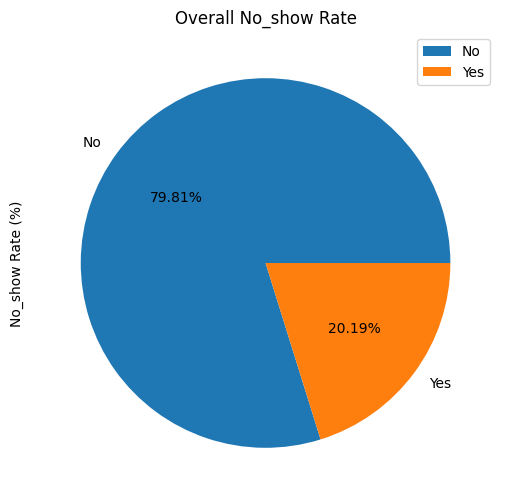

In [23]:
df['no_show_desc'].value_counts().plot(kind='pie', title='Overall No_show Rate', ylabel='No_show Rate (%)', figsize=(7,6), autopct='%1.2f%%', legend=True);
# Plot the overall no_show rate output using a pie chart.

As shown in the previous statistics and the pie chart, the majority is for patients who show up on their appointments with almost %80, while %20 of patients missed their scheduled appointments.

In [24]:
no_show_gender = df.groupby('gender')['no_show'].mean() * 100
print("No_show Rate Related to Gender:")
print(no_show_gender)
# Calculate the relationship between the gender and no_show rate 
# and print the rate for no_show rate by gender.

No_show Rate Related to Gender:
gender
F    20.306161
M    19.971499
Name: no_show, dtype: float64


<AxesSubplot: title={'center': 'No_show Rate Related to Gender'}, xlabel='Gender', ylabel='No_show Rate (%)'>

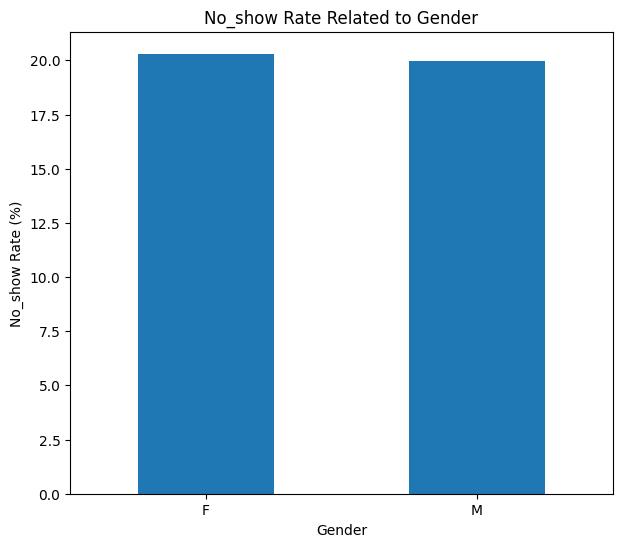

In [25]:
no_show_gender.plot(kind='bar', title='No_show Rate Related to Gender', ylabel='No_show Rate (%)', xlabel='Gender', rot=0, figsize=(7,6))
# Plot the relationship between the gender and no_show rate output using a bar chart.

In order to answer the question stated in the first section, and to know which factors are important to predict if a patient will show up for their scheduled appointment, we will explore each carachteristic, to specify the relation between it and appointment's no_show.

We started with the gender, and we can see through calculating the rate of the no_show by the gender that the femal no_show mean is %20.3, and the male no_show rate is %19.9, which means both genders have almost the same no_show rate, and it's visualized with a bar chart showing there is a slight difference and not taken in consideration.

So we beleive that the gender characteristic is not an important factor, and couldn't be used to predict if a female or a male patient will affect the rate show up for their appointment.

In [26]:
no_show_age = df.groupby('age')['no_show'].mean() * 100
print("No_show Rate Related to Age:")
print(no_show_age)
# Calculate the relationship between the age and no_show rate 
# and print the rate for no_show rate by age.

No_show Rate Related to Age:
age
0      18.055948
1      18.257809
2      15.574784
3      18.307997
4      21.742483
         ...    
98     16.666667
99      0.000000
100     0.000000
102     0.000000
115    60.000000
Name: no_show, Length: 103, dtype: float64


<AxesSubplot: title={'center': 'No_show Rate Related to Age'}, xlabel='Age', ylabel='No_show Rate (%)'>

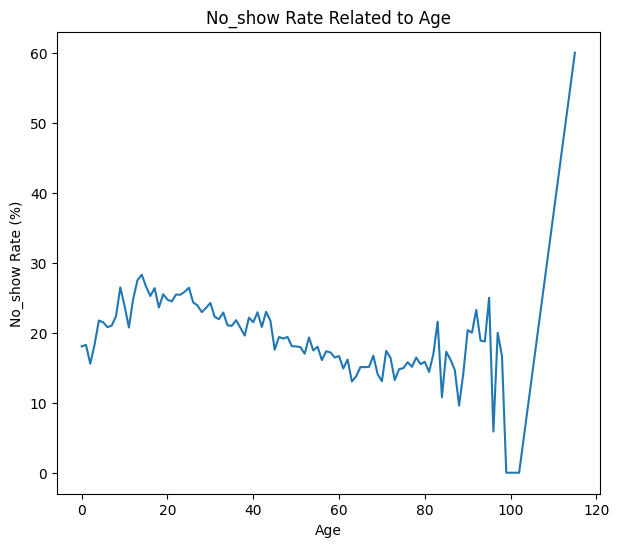

In [27]:
no_show_age.plot(
    kind='line',
    title='No_show Rate Related to Age',
    ylabel='No_show Rate (%)',
    xlabel='Age',
    figsize=(7, 6)
)
# Plot the relationship between the age and no_show rate output using a line plot.

While trying to investigate the no_show rate by the age, we can see in the computed statistics that there is a higher number of values, where the age range in this dataset is from 0 to 115, and each age in this range has a no_show rate, which make it difficult to be visualized using the bar chart, so we used the line chart. It's obvious that the no_show rate for all ages are almost in the similar range, except the age between 100 and 120, the rate is getting illogically high, which is considered to be an outlier, and this could be shown in the following box plot.

<AxesSubplot: title={'center': 'No_show Rate Related to Age'}, ylabel='No_show Rate (%)'>

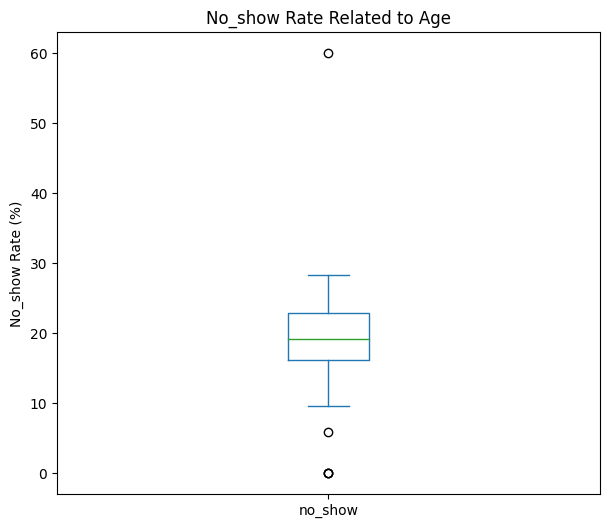

In [28]:
no_show_age.plot(
    kind='box',
    title='No_show Rate Related to Age',
    ylabel='No_show Rate (%)',
    figsize=(7, 6)
)
# Plot the distribution of the no_show rate based on age using a bos plot.

We can see how the rate by the age is distributed between %15 and %25, but there some outliers near 0 and %60 no_show rate, so in order to pass these outliers in the rate a new column is created called `age_group` with the following age groups `['0-20', '21-40', '41-60', '61-70', '70+']`, and each patient's age is assigned to one of these groups, which make it easier to represented in bar chart.

In [29]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 70, 120], labels=['0-20', '21-40', '41-60', '61-70', '70+'])
# Create a new column called age_group and assign each age to a specific group.

no_show_age_group = df.groupby('age_group')['no_show'].mean() * 100
print("No_show Rate Related to Age Group:")
print(no_show_age_group)
# Calculate the relationship between the age_group and no_show rate 
# and print the rate for no_show rate by age_group.

No_show Rate Related to Age Group:
age_group
0-20     22.819932
21-40    22.982359
41-60    18.577943
61-70    14.730904
70+      15.745629
Name: no_show, dtype: float64


<AxesSubplot: title={'center': 'No_show Rate Related to Age Group'}, xlabel='Age Group', ylabel='No_show Rate (%)'>

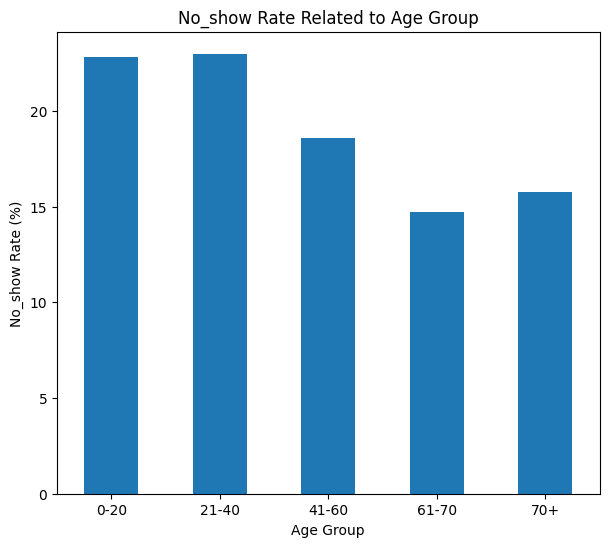

In [30]:
no_show_age_group.plot(kind='bar', title='No_show Rate Related to Age Group', ylabel='No_show Rate (%)', xlabel='Age Group', rot=0, figsize=(7,6))
# Plot the relationship between the age_group and no_show rate output using a bar chart.

Through reviewing the statistics and the bar chart of the no_show rate by age group, we can notice that there is a higher no_show rate - around %23 - for younger ages from 0 to 40, and lower rate - around %15 - for elder patients from 61 to 70.
From this point of view, the age group feature could be one of the factors that may affect the no_show rate, and consider the younger patients may miss their appoints more than elder patients.

In [31]:
no_show_neighborhood = df.groupby('neighbourhood')['no_show'].mean().sort_values(ascending=False) * 100
print("Top 5 Neighborhoods with the Highest No_show Rates:")
print(no_show_neighborhood.head())
# Calculate the relationship between the neighborhood and no_show rate 
# and print the rate for the highest 5 no_show rate by neighborhood.

Top 5 Neighborhoods with the Highest No_show Rates:
neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    100.000000
SANTOS DUMONT                   28.963893
SANTA CECÍLIA                   27.455357
SANTA CLARA                     26.534653
ITARARÉ                         26.261762
Name: no_show, dtype: float64


<AxesSubplot: title={'center': 'Top 5 Neighborhoods with the Highest No_show Rates'}, xlabel='Neighborhood', ylabel='No_show Rate (%)'>

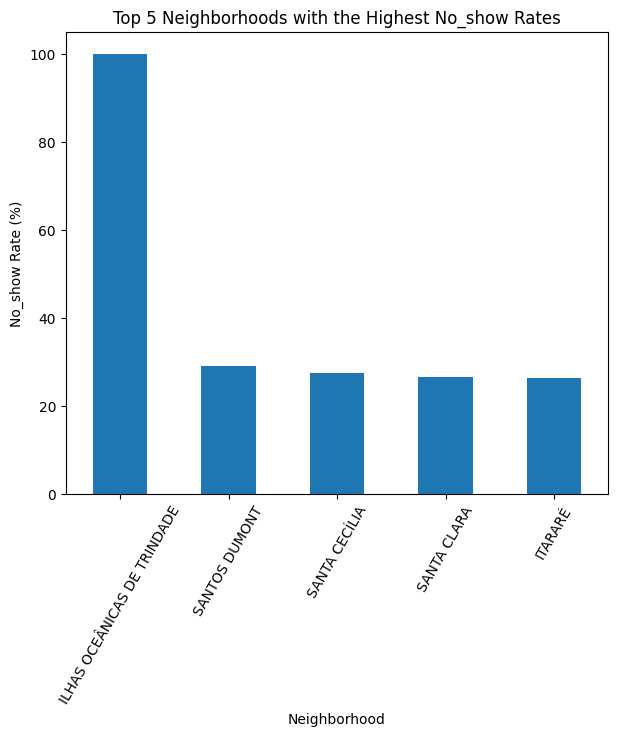

In [32]:
no_show_neighborhood.head().plot(kind='bar', title='Top 5 Neighborhoods with the Highest No_show Rates', ylabel='No_show Rate (%)', xlabel='Neighborhood', rot=60, figsize=(7,6))
# Plot the relationship between the neighborhood and no_show rate output using a bar chart.

Its hard to represent around 80 unique neighborhoods in the dataset using a bar chart, so we focused on 5 neighborhoods with the highest no_show rate. It's obvious in the previous statistics and the visualization that most neighborhoods are having almost similar no_show rate - between %26 and %29 - except *"ILHAS OCEÂNICAS DE TRINDADE"* which have the highest no_show rate with %100. This means that all appointments made in this neighborhood were missed. This will lead to predict that most of the future appointments in the mentioned neighborhood may be missed.   

In [33]:
no_show_scholarship = df.groupby('scholarship')['no_show'].mean() * 100
print("No_show Rate Related to Scholarship:")
print(no_show_scholarship)
# Calculate the relationship between the scholarship and no_show rate 
# and print the rate for no_show rate by scholarship.

No_show Rate Related to Scholarship:
scholarship
0    19.799154
1    23.766485
Name: no_show, dtype: float64


<AxesSubplot: title={'center': 'No_show Rate Related to Scholarship'}, xlabel='Scholarship', ylabel='No_show Rate (%)'>

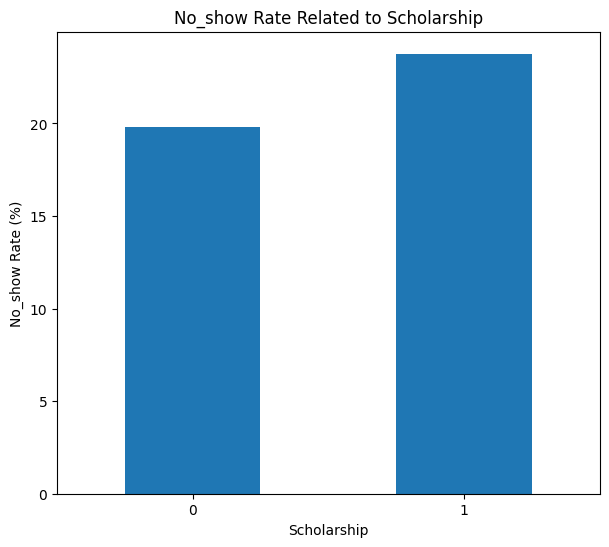

In [34]:
no_show_scholarship.plot(kind='bar', title='No_show Rate Related to Scholarship', ylabel='No_show Rate (%)', xlabel='Scholarship', rot=0, figsize=(7,6))
# Plot the relationship between the scholarship and no_show rate output using a bar chart.

Through reviewing the statistics and the bar chart of the no_show rate by scholarship, we can notice that there is a slightly higher no_show rate - around %24 - for patients with scholarship, and slightly lower rate - around %20 - for patients with no scholarship. It supposed to be the opposit, where the patients with scholarship may not pay or pay less than patients without scholarship, which encourage them to show up in their scheduled appointment.

From this finding, we beleive that the scholarship characteristic may not be an important factor, and may not be useful to affect the no_show rate.

In [35]:
health_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
# Create an array with health conditions in the dataset.
print("No_show Rate Related to Health Conditions:")
for condition in health_conditions:
    no_show_condition = df.groupby(condition)['no_show'].mean() * 100
    print(no_show_condition)
# Calculate the relationship between the each health condition and no_show rate 
# and print the rate for no_show rate by these conditions.

No_show Rate Related to Health Conditions:
hypertension
0    20.907162
1    17.259164
Name: no_show, dtype: float64
diabetes
0    20.357931
1    18.000000
Name: no_show, dtype: float64
alcoholism
0    20.190708
1    20.137232
Name: no_show, dtype: float64
handicap
0    20.233280
1    17.843137
Name: no_show, dtype: float64


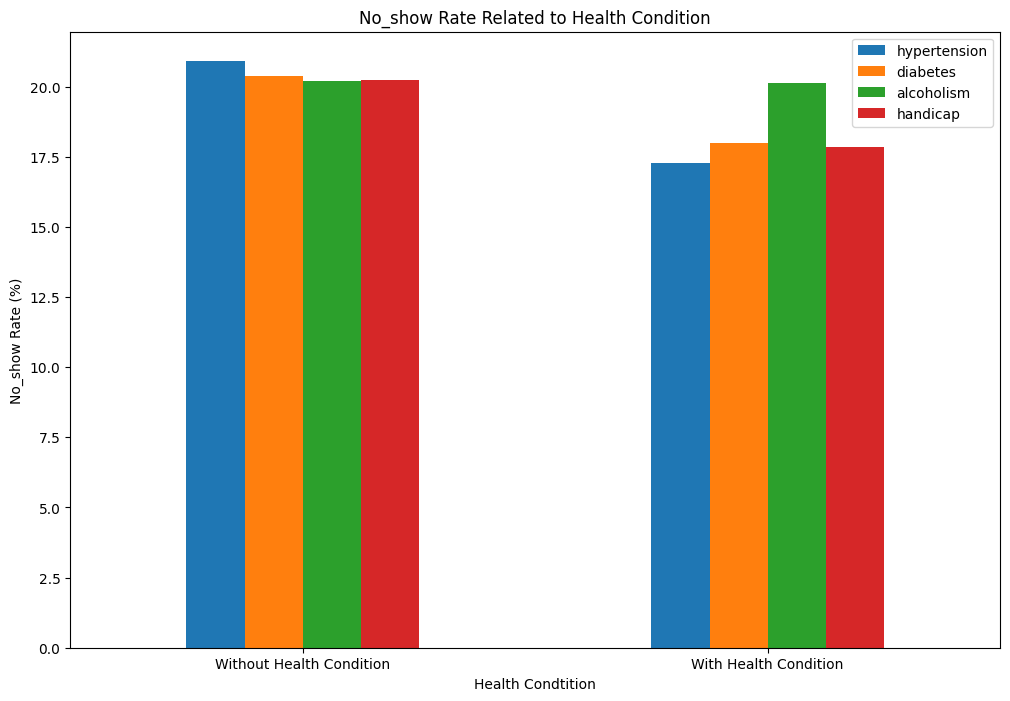

In [36]:
pd.DataFrame(
    {
        'hypertension': [20.907162, 17.259164],
        'diabetes': [20.357931, 18.000000],
        'alcoholism': [20.190708, 20.137232],
        'handicap': [20.233280, 17.843137]
    },
    index= ['Without Health Condition', 'With Health Condition']
).plot(
    kind="bar",
    title="No_show Rate Related to Health Condition",
    legend=True,
    xlabel="Health Condtition",
    ylabel="No_show Rate (%)",
    rot=0,
    figsize=(12, 8)
);
# Create a DataFrame inluding the previously calculated relationship 
# between each health condition and no_show rate, 
# and plot the relationship between these health conditions and no_show rate output using a bar chart.

We managed to include all the four health conditions `['hypertension', 'diabetes', 'alcoholism', 'handicap']` in one bar chart to reduce repeating the same code and to have wider view for the relationship between these features and the no_show rate. As shown in the chart legend, the blue bar is representing `hypertension`, the orange bar is representing `diabetes`, the green bar is representing `alcoholism` and the red bar is for the `handicap`. Besides using the "Without Health Condition" for 0 value, and "With Health Condition" for 1 value.

It's obvious in the statistics and the chart there is no sufficient difference in the no_show rate for the four health conditions whether having health condition or not. So, these features may not have an efficient effect on the no_show rate, and may not be useful to predict the show up rate in the future appointments. 

In [37]:
no_show_sms = df.groupby('sms_received')['no_show'].mean() * 100
print("No_show Rate Related to SMS Received:")
print(no_show_sms)
# Calculate the relationship between the sms_received and no_show rate 
# and print the rate for no_show rate by sms_received.

No_show Rate Related to SMS Received:
sms_received
0    16.689145
1    27.585720
Name: no_show, dtype: float64


<AxesSubplot: title={'center': 'No_show Rate Related to SMS Received'}, xlabel='SMS Received', ylabel='No_show Rate (%)'>

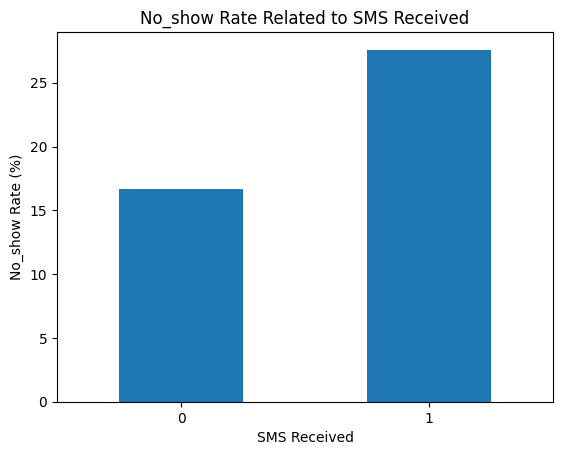

In [38]:
no_show_sms.plot(kind='bar', title='No_show Rate Related to SMS Received', ylabel='No_show Rate (%)', xlabel='SMS Received', rot=0)
# Plot the relationship between the sms_received and no_show rate output using a bar chart.

There is a sufficient difference in the no_show rate between patients received sms and not. This could be concluded for the previous statistics and the chart. It's obvious that patients who received a reminder have a higher no_show rate - around %28 - than patients who didn't receive a reminder with a no_show rate - arond %17 -, but it's not making sense, while these reminder sms are sent to remind patients with their appointments and to reduce the no_show rate, but here it have the opposite result.

In our opinion, it's better to cancel this service, and not considering it in predecting the no_show rate for the future appointment. 

### Second Question: How does the time difference between the scheduled date and the appointment date (waiting time) affect the no-show rate?

In order to answer this question, and to know How the waiting time between the scheduled date and the appointment date affect the no-show rate, we will calculate the relationship between the column we created in the data cleaning section, called `time_diff` and the `no_show`.

In [39]:
no_show_time_diff = df.groupby('time_diff')['no_show'].mean() * 100
print(no_show_time_diff)
# Calculate the relationship between the time_diff and no_show rate 
# and print the rate for no_show rate by time_diff.

time_diff
0       4.645966
1      21.329746
2      23.793206
3      23.589744
4      23.280924
         ...    
155    60.000000
162    18.181818
169    12.500000
176    37.500000
179    20.000000
Name: no_show, Length: 129, dtype: float64


In [40]:
no_show_time_diff.quantile(q=[0.25, 0.5, 0.75, 0.9, 0.95])

0.25    22.000000
0.50    31.034483
0.75    35.951662
0.90    40.676239
0.95    60.000000
Name: no_show, dtype: float64

In [41]:
no_show_time_diff.describe()

count    129.000000
mean      29.862315
std       19.765036
min        0.000000
25%       22.000000
50%       31.034483
75%       35.951662
max      100.000000
Name: no_show, dtype: float64

<AxesSubplot: title={'center': 'No_show Rate by Waiting Time'}, xlabel='Waiting Time (Days)', ylabel='No_show Rate (%)'>

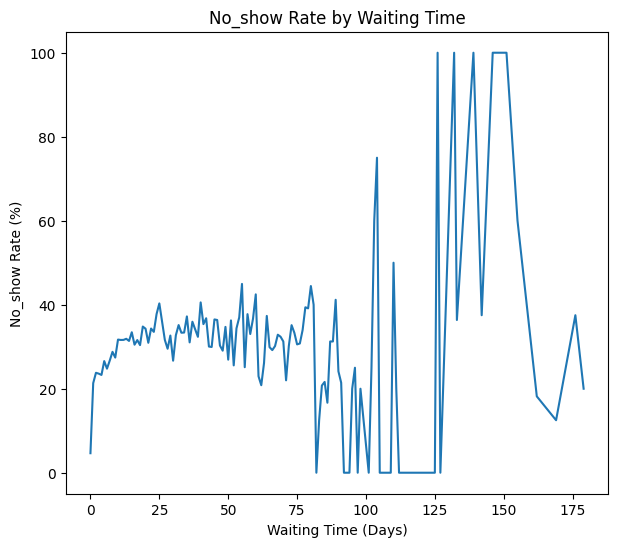

In [42]:
no_show_time_diff.plot(
    kind='line',
    title='No_show Rate by Waiting Time',
    ylabel='No_show Rate (%)',
    xlabel='Waiting Time (Days)',
    figsize=(7, 6)
)
# Plot the relationship between the time_diff and no_show rate output using a line plot.

It's obvious in the previous statistics that there is a high number of values, where the `time_diff` range in this dataset is from 0 to 179, which make it difficult to be visualized using the bar chart, so we used the line chart. In general, values of the no_show rate for all wating times vary between %22 and %60 as shown in the previous statistics using the `quantile()` function, on the other hand, there are some waiting times with no_show rate lower than this range starting from %0, and higher rate reaching %100 specially for longer waiting times. As shown in the previous line chart, the no_show rate is getting higher when the waiting time (`time_diff`) getting longer than 125 days. This could be  represented through grouping `time_diff` to get better visualization.

In [43]:
df['time_diff_group'] = pd.cut(df['time_diff'], bins=[0, 50, 90, 130, 180], labels=['0-50', '51-90', '91-130', '130+'])
# Create a new column called age_group and assign each age to a specific group.

no_show_time_diff_group = df.groupby('time_diff_group')['no_show'].mean() * 100
print("No_show Rate Related to Time Difference Group:")
print(no_show_time_diff_group)
# Calculate the relationship between the age_group and no_show rate 
# and print the rate for no_show rate by age_group.

No_show Rate Related to Time Difference Group:
time_diff_group
0-50      28.435253
51-90     30.626290
91-130    20.143885
130+      35.897436
Name: no_show, dtype: float64


<AxesSubplot: title={'center': 'No-show Rate by Waiting Time'}, xlabel='Waiting Time (Days)', ylabel='No-show Rate'>

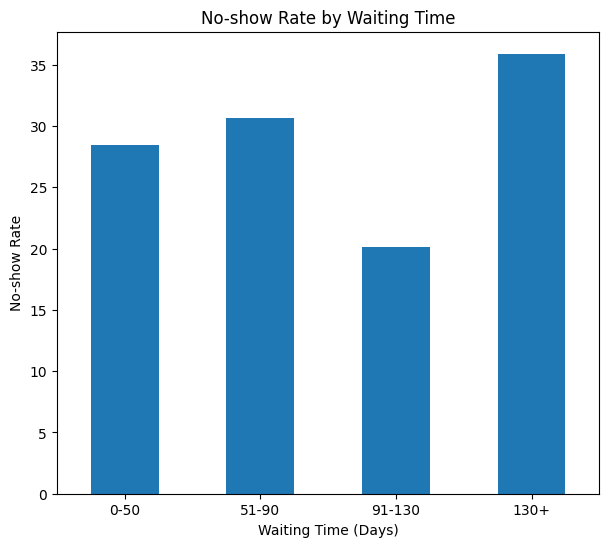

In [44]:
no_show_time_diff_group.plot(
    kind='bar',
    title='No-show Rate by Waiting Time',
    ylabel='No-show Rate',
    xlabel='Waiting Time (Days)',
    figsize=(7, 6),
    rot=0
)

Through analyzing the previous bar chart, it's shown that the no_show rate is getting the highest rate over 130 days with almost %36, while the lowest rate is %20 for waiting time between 90 and 130 days, and the remaining waiting time ranges (0-50 days) and (51-90 days) have moderate no_show rate with %28 and %31 comparing with the highest waiting time range.

Referring to this finding, it may be more appropriate to decrease the waiting time through preventing the far schedule of appointments to reduce the no_show rate.

<a id='conclusions'></a>
## Conclusions

The data analysis for the 'No-show appointments' dataset, which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment, started with loading the dataset and provide a research questions to investigate through the dataset in order to answer questions provided in the first section, these questions are:
1) What factors are important to predict if a patient will show up for their scheduled appointment?
2) How does the time difference between the scheduled date and the appointment date (waiting time) affect the no-show rate?

In order to answer the first question, we started exploring the relation between each feature and the no_show rate, this exploration is done through the following:
* First, the overall no_show rate represented in the statistical calculation and the pie chart, shows that the no_show rate is lower than the show rate, with almost %20 to %80.
* The gender characteristic is not an important factor, and couldn't be used to predict if a female or a male patient will affect the rate show up for their appointment, since there is no sufficient difference in the no_show rate for male and female.
* After grouping patients in age groups, the age feature could be one of the factors that may affect the no_show rate, and consider the younger patients may miss their appoints more than elder patients.
* All appointments made in the neighborhood "ILHAS OCEÂNICAS DE TRINDADE" were missed. This will lead to predict that most of the future appointments in the mentioned neighborhood may be missed. On the other hand, all appointments from other neighborhoods have a moderate no_show rate.
* The scholarship characteristic may not be an important factor, and may not be useful to affect the no_show rate, where the no_show rate difference is moderate.
* The four health conditions `['hypertension', 'diabetes', 'alcoholism', 'handicap']` have no sufficient difference in the no_show rate whether having health condition or not. So, these features may not have an efficient effect on the no_show rate, and may not be useful to predict the show up rate in the future appointments.
* The reminder sms is sent to remind patients with their appointments and to reduce the no_show rate, but through the statistics it have the opposite result, which lead to not considering it in predecting the no_show rate for the future appointment.

To answer the second question, the time difference between the scheduled date and the appointment date is calculated, and a statistics are computed in order to calculate the relationship between the waiting time and no_show rate. Referring to these statistics and charts represented, it's obvious that the no_show rate is getting a higher rate for longer waiting time (over 130 days), and it may be better to decrease the waiting time through preventing the far schedule of appointments to reduce the no_show rate.

The main limitation faced during exploring and anlyzing this dataset, is the limited time frame for the `appointmentday`, which is covering appointments from the last week of April 2016 till the first week of June 2016. This may not cover different seasons, so we recommend to involve a distributed time frames to cover different seasons and to have a wider dataset.

In [45]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 773958 bytes to Investigate_a_Dataset.html
